In [1]:
plots="/sharedFolder/Results/Ligase4/rpmPlot/"
dir.create(plots)
# centering with 'scale()'
center_scale <- function(x) {
    scale(x, scale = FALSE)
}
library("pheatmap")
library("vioplot")
results="/sharedFolder/Results/Ligase4/"
previousResults="/sharedFolder/Results/Hotspot/"
library("ggVennDiagram");
library("ggplot2")
library("GenomicRanges")
path="/sharedFolder/Data/1_HTGTS/3_JunctionPaper/junction_pooled"
rider2="/sharedFolder/rider/RIDER_v0.2.jar"
hotspotpath="/sharedFolder/Results//Hotspot/"
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
gg=GRanges(seqnames=as.matrix(Database[,1]),ranges=IRanges(start = as.numeric(Database[,2]),end=as.numeric(Database[,3])))    
library(eulerr)


Warning message in dir.create(plots):
“'/sharedFolder/Results/Ligase4/rpmPlot' already exists”
Loading required package: sm

Package 'sm', version 2.2-5.7: type help(sm) for summary information

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading requi

In [2]:
#Venn diagram plot. Check how many hotspot are in common
Database=read.table(paste(previousResults,"Database.csv",sep="/"),header=TRUE,sep=",")
types=c("Ligase4")
conditions=c("DMSO","Taze","Vale")
for(j in types){
subBase=Database[grep(j,Database[,6]),]
x <- list()
count=1
for(i in conditions){
x[[count]]=subBase[grep(i,subBase[,6]),7]
count=count+1
}
names(x)=conditions
system("echo yeah")
}
jjj=(unlist(x))
j2=x


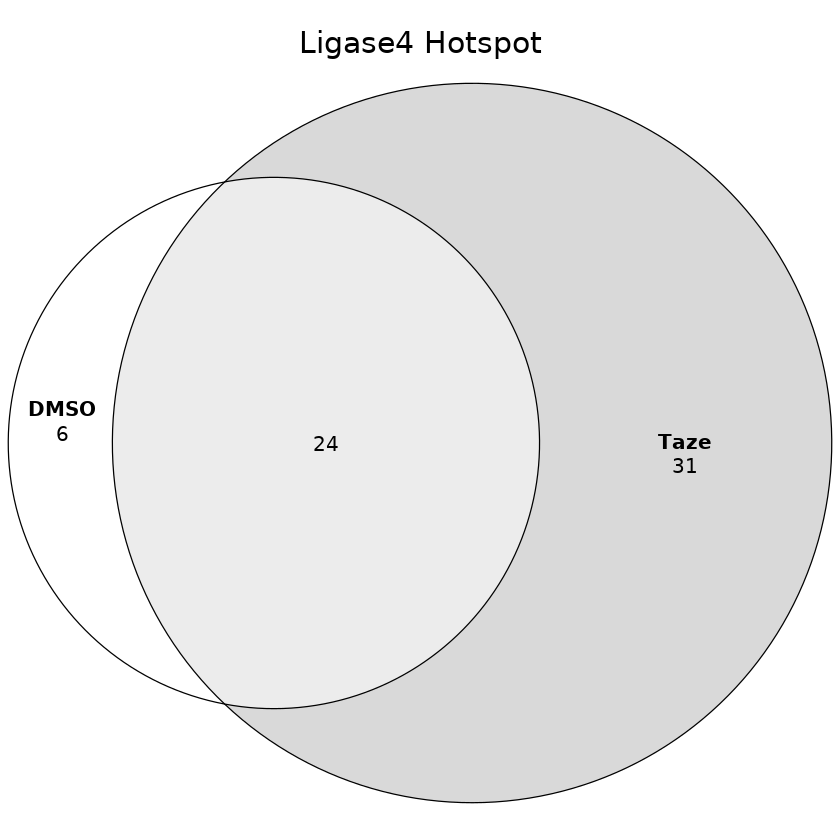

In [3]:
mj2=list()
count=1
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))
a2=as.matrix(read.table(paste(results,"/rpmPlot/filtered/filtered_Lig_DMSOTaze.csv",sep=""),sep=",",header=TRUE,row.names=1))
temp=a[sapply(setdiff(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Taze),toString),c(1,2)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Taze,j2$DMSO),toString),c(1,2)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

mj2[[count]]=temp[intersect(rownames(a2),rownames(temp)),]
count=count+1
mj2[[count]]=temp2[intersect(rownames(a2),rownames(temp2)),]

count=count+1
mj2[[count]]=temp3[intersect(rownames(a2),rownames(temp3)),]

xTaze=list()
xTaze[[1]]=union(rownames(mj2[[1]]),rownames(mj2[[2]]))
xTaze[[2]]=union(rownames(mj2[[2]]),rownames(mj2[[3]]))
names(xTaze)=c("DMSO","Taze")

j3=xTaze

fit1 <- euler(c("DMSO" = length(setdiff(j3$DMSO,j3$Taze)), "Taze" = length(setdiff(j3$Taze,j3$DMSO)),"DMSO&Taze"=length(intersect(j3$DMSO,j3$Taze)) ))
plot(fit1,quantities = TRUE,main="Ligase4 Hotspot")



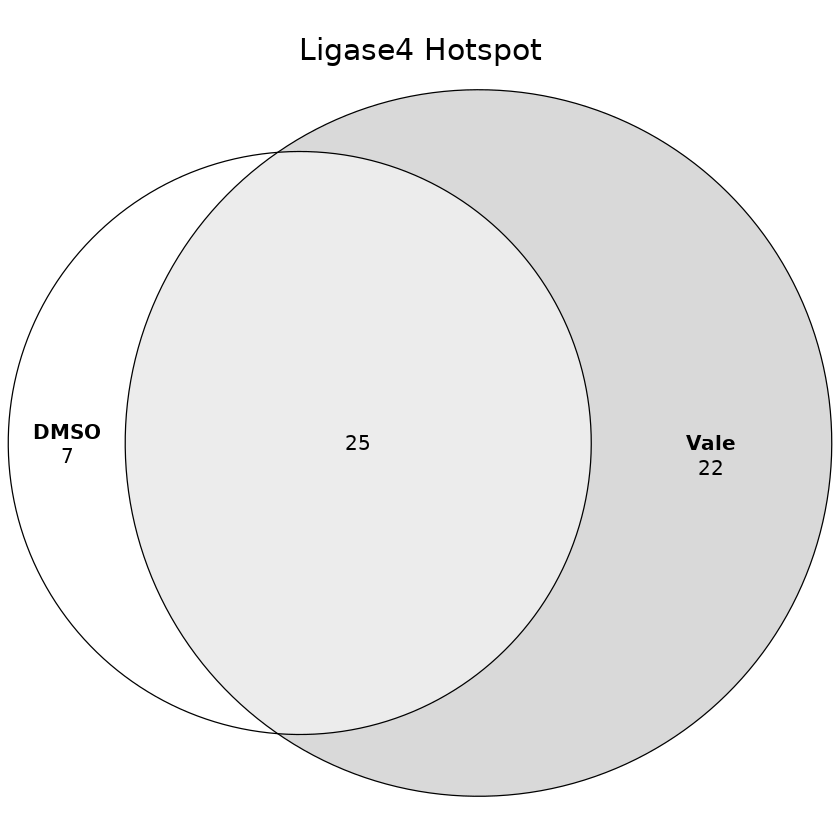

In [4]:
count=count+1



temp=a[sapply(setdiff(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp)>2){
temp=temp[sort(temp[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp2=a[sapply(intersect(j2$DMSO,j2$Vale),toString),c(1,3)]
if(length(temp2)>2){
temp2=temp2[sort(temp2[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}
temp3=a[sapply(setdiff(j2$Vale,j2$DMSO),toString),c(1,3)]
if(length(temp3)>2){
temp3=temp3[sort(temp3[,1],index.return=TRUE,decreasing=TRUE)$ix,]
}

a2=as.matrix(read.table(paste(results,"/rpmPlot/filtered/filtered_Lig_DMSOVale.csv",sep=""),sep=",",header=TRUE,row.names=1))

mj2[[count]]=temp[intersect(rownames(a2),rownames(temp)),]
count=count+1
mj2[[count]]=temp2[intersect(rownames(a2),rownames(temp2)),]

count=count+1
mj2[[count]]=temp3[intersect(rownames(a2),rownames(temp3)),]
xVale=list()
xVale[[1]]=union(rownames(mj2[[1+3]]),rownames(mj2[[2+3]]))
xVale[[2]]=union(rownames(mj2[[2+3]]),rownames(mj2[[3+3]]))
names(xVale)=c("DMSO","Vale")
j3=xVale

fit1 <- euler(c("DMSO" = length(setdiff(j3$DMSO,j3$Vale)), "Vale" = length(setdiff(j3$Vale,j3$DMSO)),"DMSO&Vale"=length(intersect(j3$DMSO,j3$Vale)) ))
plot(fit1,quantities = TRUE,main="Ligase4 Hotspot")
 

In [5]:
#write.table(unique(union(xTaze$DMSO,xTaze$Taze)),"/sharedFolder/Results/Ligase4/HotspotIDList/TazeFiltered.csv",col.names=FALSE,row.names=FALSE)
#write.table(unique(union(xVale$Vale,xVale$DMSO)),"/sharedFolder/Results/Ligase4/HotspotIDList/ValeFiltered.csv",col.names=FALSE,row.names=FALSE)
#write.table(intersect(xTaze$DMSO,xTaze$Taze),"/sharedFolder/Results/Ligase4/HotspotIDList/TAZEcommonFiltered.csv",col.names=FALSE,row.names=FALSE)
#write.table(intersect(xVale$DMSO,xVale$Vale),"/sharedFolder/Results/Ligase4/HotspotIDList/VALEcommonFiltered.csv",col.names=FALSE,row.names=FALSE)

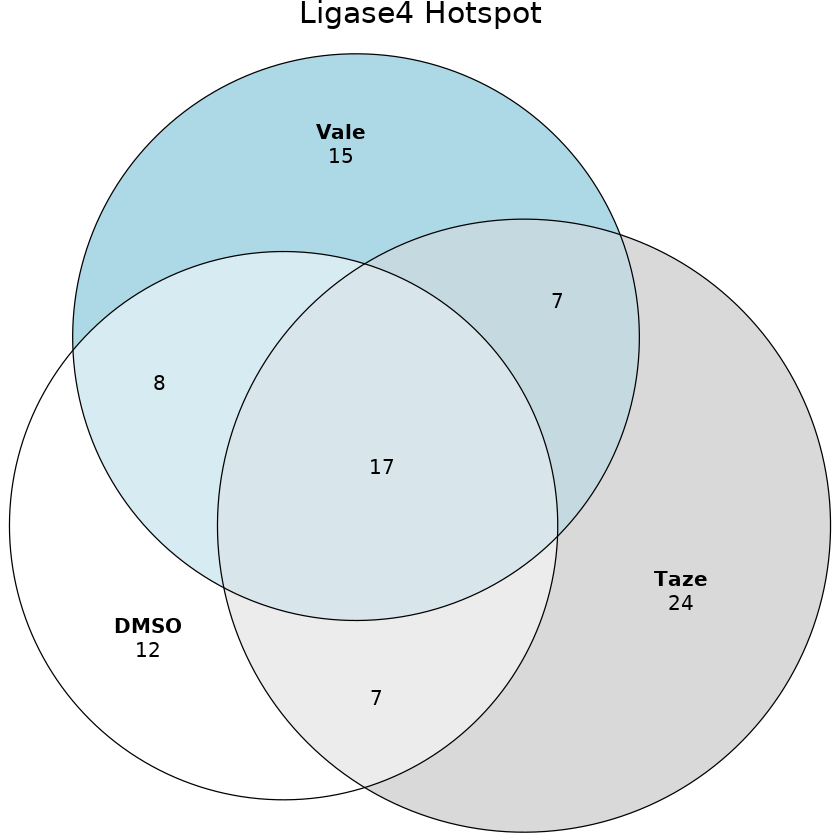

In [6]:
j2Filtered=list(union(xTaze$DMSO,xVale$DMSO),xTaze$Taze,xVale$Vale)
 names(j2Filtered)=c("DMSO","Taze","Vale")
fit1 <- euler(c("DMSO" = length(setdiff(setdiff(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)), "Taze" = length(setdiff(setdiff(j2Filtered$Taze,j2Filtered$DMSO),j2Filtered$Vale)), "Vale" = length(setdiff(setdiff(j2Filtered$Vale,j2Filtered$Taze),j2Filtered$DMSO)),"DMSO&Taze&Vale"=length(intersect(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)),"DMSO&Taze"=length(setdiff(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)),"DMSO&Vale"=length(setdiff(intersect(j2Filtered$DMSO,j2Filtered$Vale),j2Filtered$Taze)),"Taze&Vale"=length(setdiff(intersect(j2Filtered$Taze,j2Filtered$Vale),j2Filtered$DMSO)) ))
plot(fit1,quantities = TRUE,main="Ligase4 Hotspot")

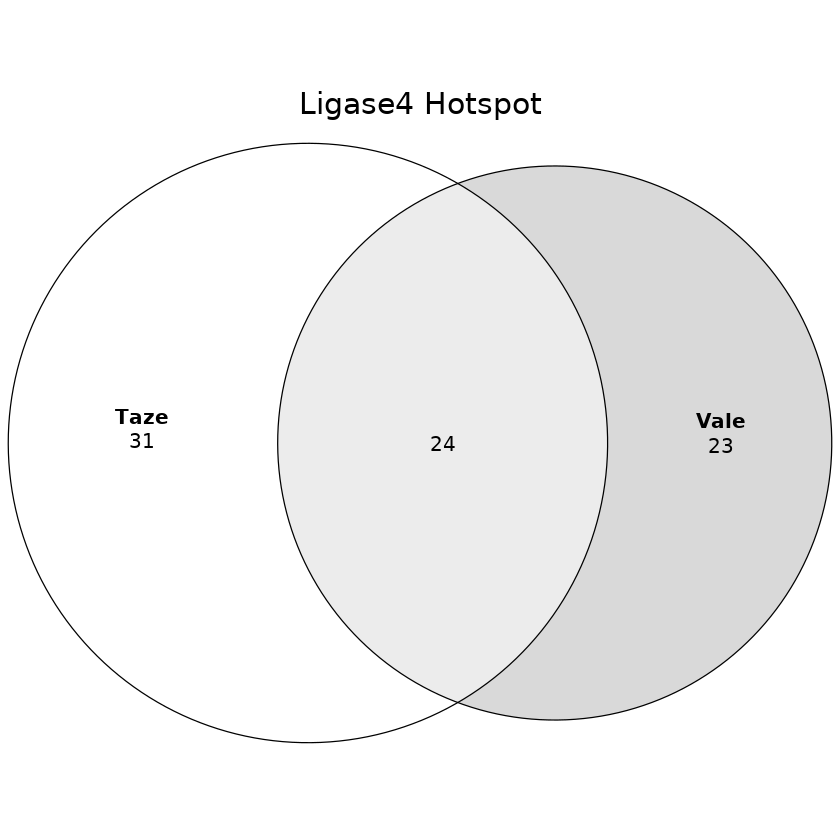

In [7]:
fit1 <- euler(c("Taze" = length(setdiff(j2Filtered$Taze,j2Filtered$Vale)), "Vale" = length(setdiff(j2Filtered$Vale,j2Filtered$Taze)),"Taze&Vale"=length(intersect(j2Filtered$Vale,j2Filtered$Taze)) ))
plot(fit1,quantities = TRUE,main="Ligase4 Hotspot")

In [8]:
tj=c(length(j2Filtered$DMSO),length(j2Filtered$Taze),length(j2Filtered$Vale))
names(tj)=c("DMSO","Taze","Vale")
#write.table(tj,paste(results,"/rpmPlot/filtered/barplot.csv",sep=""),col.names=NA)

In [9]:
names(mj2)=c("DMSO_spec_vsTaze","DMSO_TAZE","TazeSPec","DMSO_spec_vsVale","DMSOVale","ValeSpec")
dir.create(paste(results,"/rpmPlot/filtered/sortNames/",sep=""))
for(i in seq(length(mj2))){
#write.table(rownames(mj2[[i]]),paste(results,"/rpmPlot/filtered/sortNames/_",i,"_",names(mj2)[i],".csv",sep=""),col.names=FALSE,row.names=FALSE)
}

Warning message in dir.create(paste(results, "/rpmPlot/filtered/sortNames/", sep = "")):
“'/sharedFolder/Results/Ligase4//rpmPlot/filtered/sortNames' already exists”


Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”
Warning message:
“Removed 1 rows containing non-finite values (`stat_ydensity()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


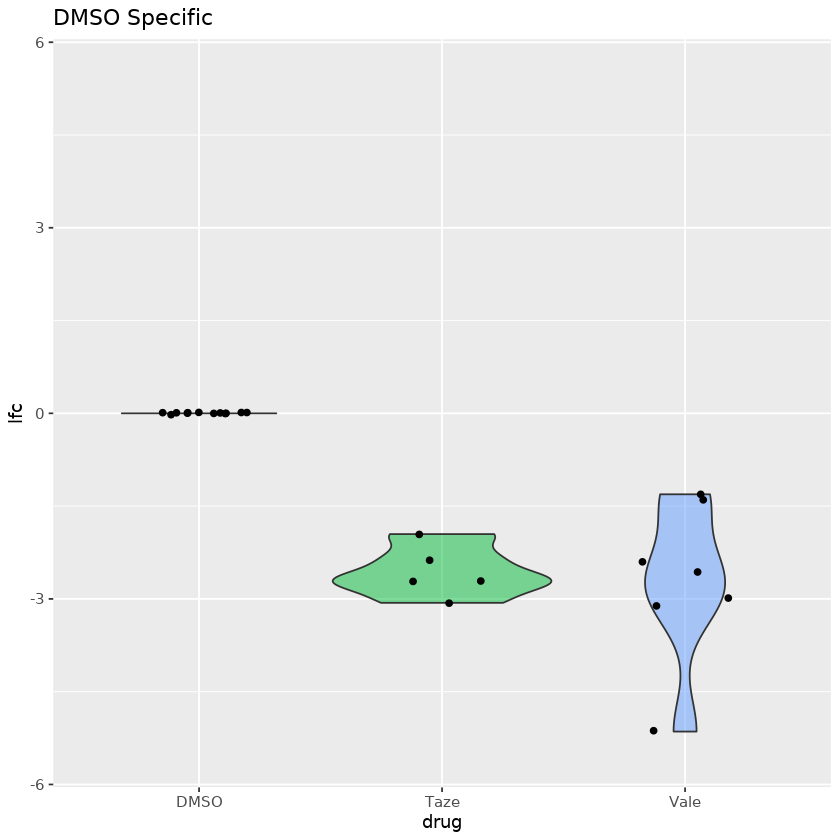

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


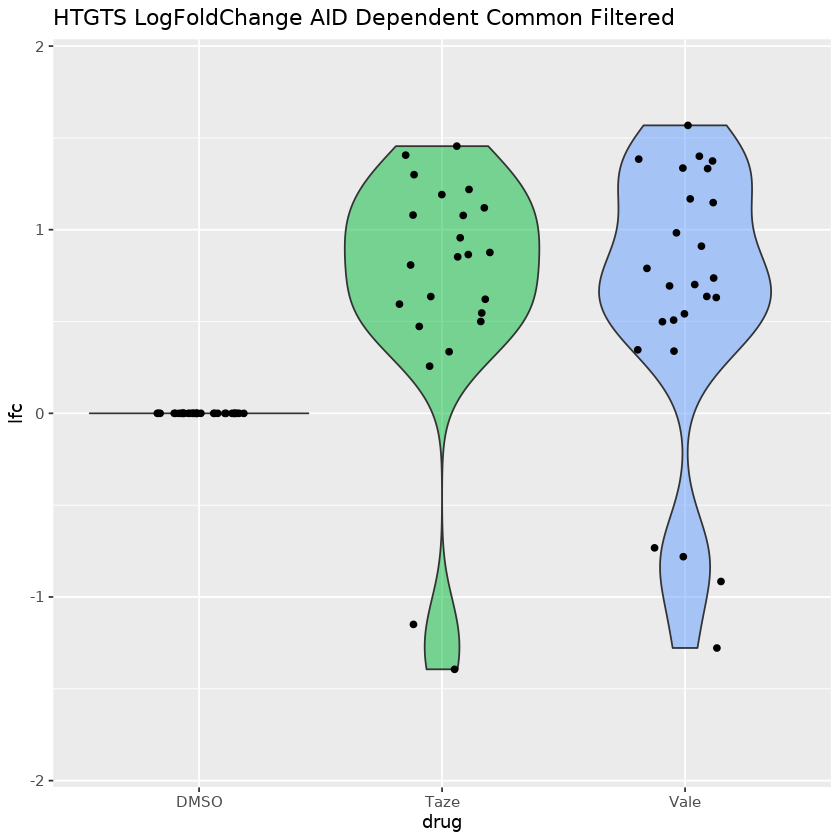

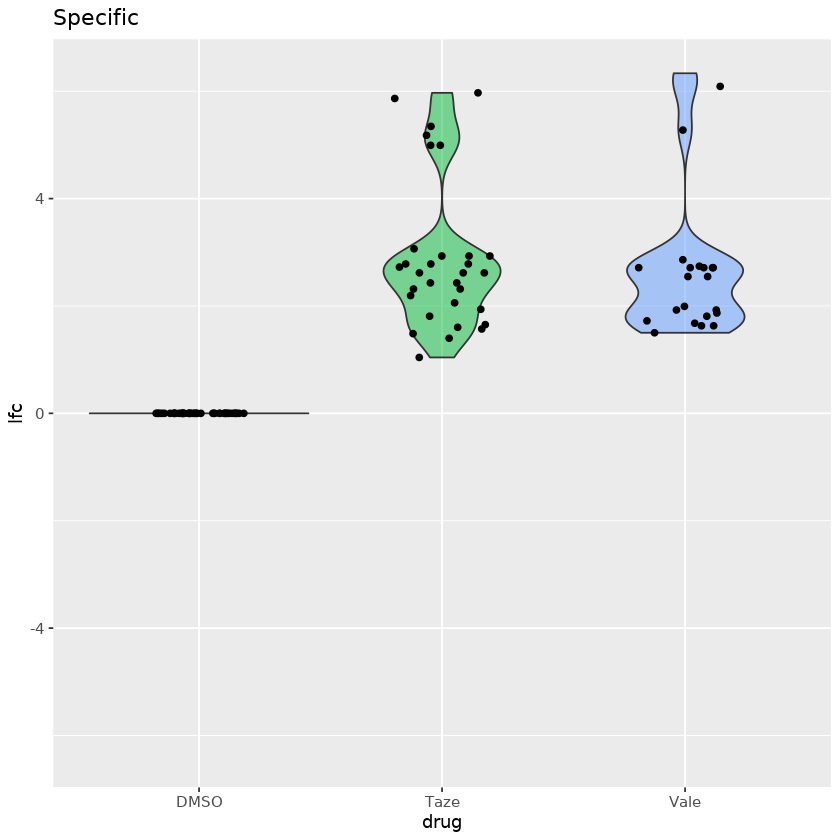

In [10]:
nn=c("DMSO Specific","HTGTS LogFoldChange AID Dependent Common Filtered","Specific")
countnn=1
for(i in seq(count/2)){
foldChange=list()
foldChange[[1]]=log2((mj2[[i]][,2]+1)/(mj2[[i]][,1]+1))
foldChange[[2]]=log2((mj2[[i+3]][,2]+1)/(mj2[[i+3]][,1]+1))
    names(foldChange)=c(colnames(mj2[[i]])[2],colnames(mj2[[i+3]])[2])
        lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    #FIGO
foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
    foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ylim(-lim,lim) + ggtitle(nn[countnn])
plot(pp)    
    
    countnn=countnn+1
}



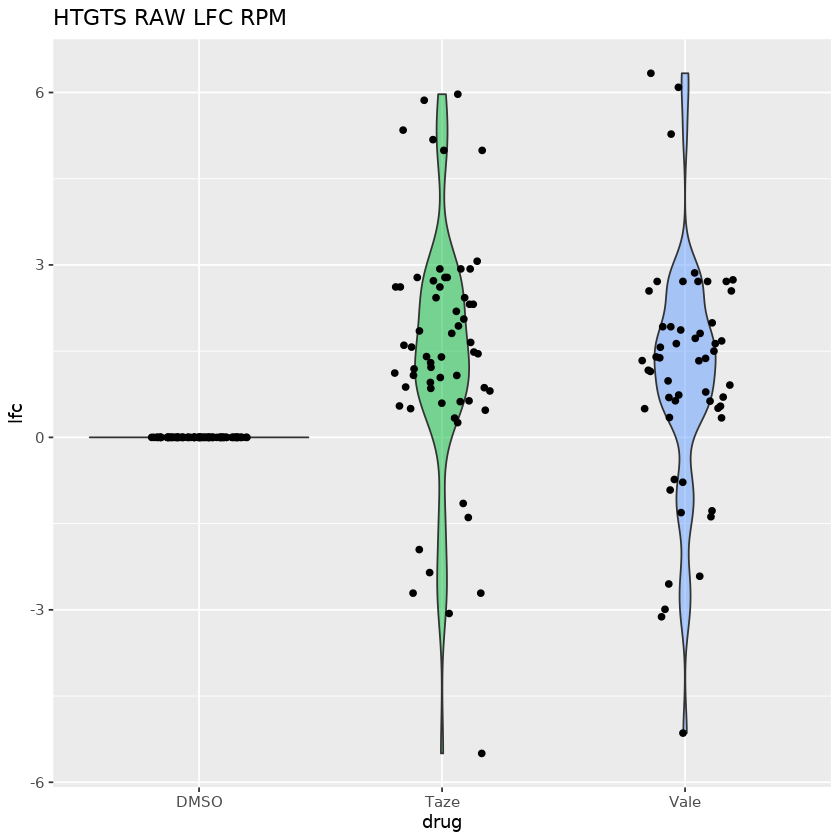

In [11]:
#FULL RAW
#FIGURE 5A
foldChange=list()
foldChange[[1]]=log2((rbind(mj2[[1]],mj2[[2]],mj2[[3]])[,2]+1)/(rbind(mj2[[1]],mj2[[2]],mj2[[3]])[,1]+1))
foldChange[[2]]=log2((rbind(mj2[[4]],mj2[[5]],mj2[[6]])[,2]+1)/(rbind(mj2[[4]],mj2[[5]],mj2[[6]])[,1]+1))
    names(foldChange)=c(colnames(mj2[[1]])[2],colnames(mj2[[4]])[2])
    lim=max(abs(foldChange[[1]]),abs(foldChange[[2]]))
    foldChangeDF=cbind(foldChange[[1]],rep("Taze",length(foldChange[[1]])))
foldChangeDF=rbind(foldChangeDF,cbind(foldChange[[2]],rep("Vale",length(foldChange[[2]]))))
foldChangeDF=rbind(foldChangeDF,cbind(0,rep("DMSO",length(unique(c(names(foldChange[[1]]),names(foldChange[[2]])))))))

colnames(foldChangeDF)=c("lfc","drug")
foldChangeDF=data.frame(foldChangeDF)
foldChangeDF$lfc=as.numeric(foldChangeDF$lfc)

pp=ggplot(foldChangeDF,aes(x=drug,y=lfc,fill=drug)) +
geom_violin(alpha = 0.5) +
geom_point(position = position_jitter(seed = 1, width = 0.2)) +
theme(legend.position = "none") + ggtitle("HTGTS RAW LFC RPM")
#theme(legend.position = "none") + ggtitle("HTGTS RAW LFC RPM")
plot(pp)    

In [18]:
DMSOSpec=setdiff(setdiff(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
TazeSpec = setdiff(setdiff(j2Filtered$Taze,j2Filtered$DMSO),j2Filtered$Vale)
ValeSpec = setdiff(setdiff(j2Filtered$Vale,j2Filtered$Taze),j2Filtered$DMSO)
common=intersect(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
TazDMSO=setdiff(intersect(j2Filtered$DMSO,j2Filtered$Taze),j2Filtered$Vale)
DMSOVale=setdiff(intersect(j2Filtered$DMSO,j2Filtered$Vale),j2Filtered$Taze)
TazVale=setdiff(intersect(j2Filtered$Taze,j2Filtered$Vale),j2Filtered$DMSO)
a=as.matrix(read.table(paste(results,"rpm_hgtgtsHeatmap.csv",sep="/"),header=TRUE,row.names=1,sep=","))[unlist(j2Filtered),]+1
yo=cbind(a[,2]/a[,1],a[,3]/a[,1])
colnames(yo)=c("Taze","Vale")
#write.table(log10(yo),paste(results,"/rpmPlot/filtered/","/lfcBoxplot.txt",sep=""),sep=",",row.names=FALSE)
#write.table(a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),],paste(results,"rpmPlot/filtered/rpm_hgtgtsHeatmapDIVIDED.csv",sep="/"),col.names=NA,sep=",")

In [19]:
data=a[sapply(c(TazeSpec,TazVale,ValeSpec,common,TazDMSO,DMSOVale,DMSOSpec),toString),]
data2=read.table(paste(results,"/count_hgtgtsHeatmap.csv",sep=""),header=TRUE,row.names=1,sep=",")
data=data2[rownames(data),]
condition_of_interest = data[,2]
condition_of_interest2 = data[,3]
reference_condition <- data[,1]
pvalueTAZE= wilcox.test(condition_of_interest, reference_condition,paired=TRUE)$p.value
pvalueVALE= wilcox.test(condition_of_interest2, reference_condition,paired=TRUE)$p.value
  cat("P-value for","Taze Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueTAZE, "\n")
  cat("P-value for","Vale Ligase4 KO", "vs DMSO Ligase4 KO is:",pvalueVALE, "\n")


P-value for Taze Ligase4 KO vs DMSO Ligase4 KO is: 2.624682e-09 
P-value for Vale Ligase4 KO vs DMSO Ligase4 KO is: 3.742076e-08 


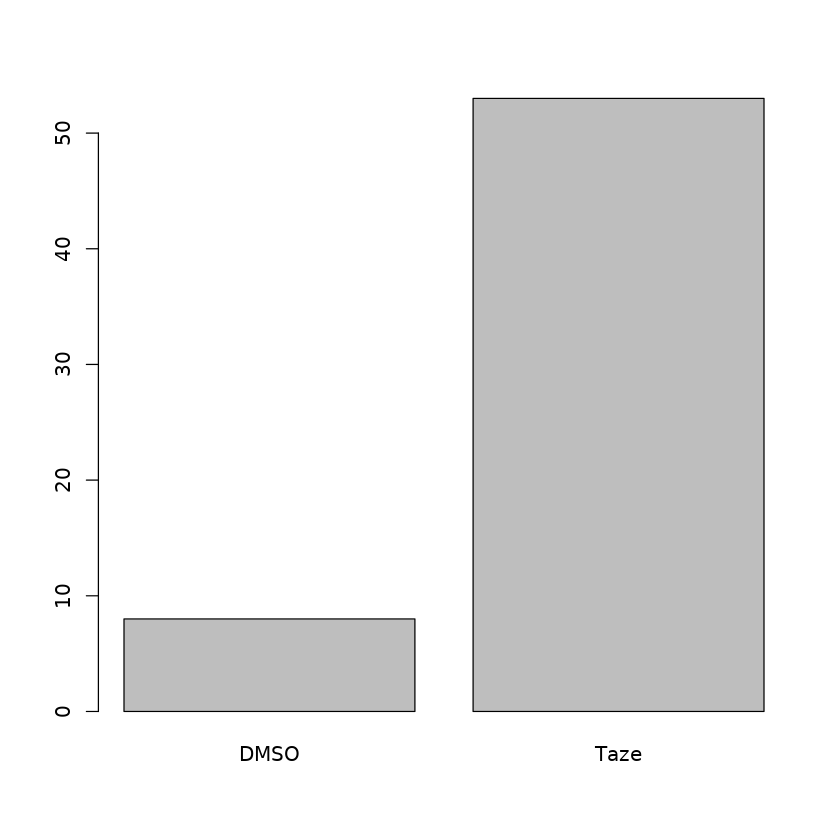

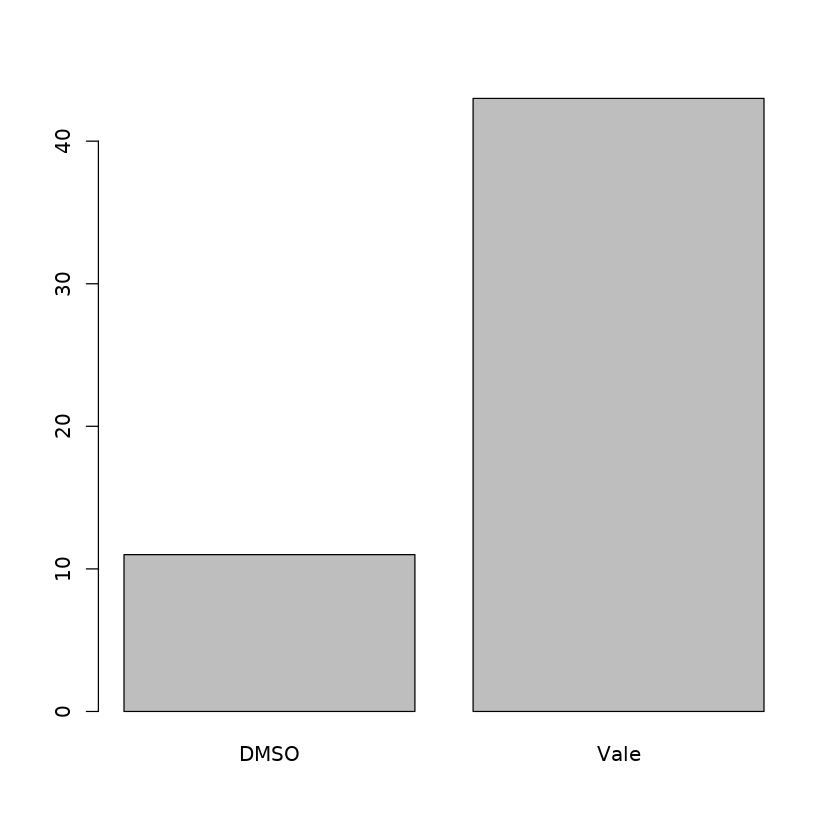

In [14]:
library(stringr)
boxy=c()
all_directories <- list.dirs(path = plots, recursive = FALSE)
matching_directories_increased <- all_directories[str_detect(all_directories, "_DMSO")]
matching_directories_decreased <- all_directories[str_detect(all_directories, "DMSO_")]
for(i in matching_directories_increased){
djNamessForever=c()
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
plotMe=c(first,second)
names(plotMe)=djNamessForever
barplot(rev(plotMe))
write.table(rev(plotMe),paste(plots,"/",djNamessForever[[1]][1],"_barplot.csv",sep=""),col.names=FALSE)    
}

[1] "/sharedFolder/Results/Ligase4/rpmPlot//Taze_DMSO"

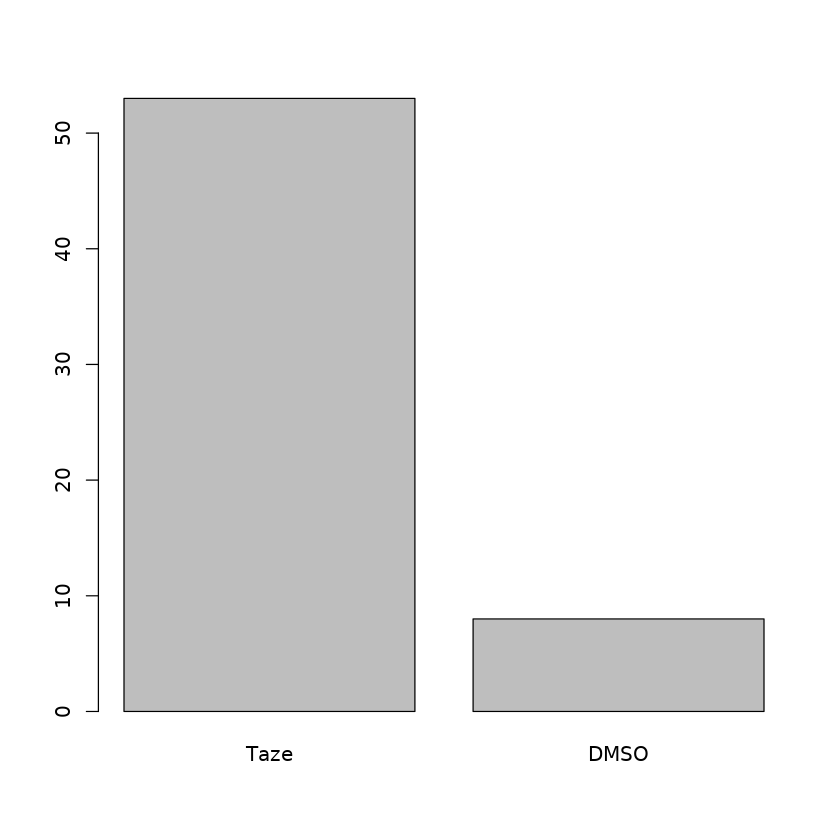

In [15]:
i =matching_directories_increased[1]
i
djNamessForever=c()
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
djNamessForever=append(djNamessForever,strsplit(basename(i),"_")[[1]][1])
plotMe=c(first,second)
names(plotMe)=djNamessForever
barplot(plotMe)

[1] "/sharedFolder/Results/Ligase4/rpmPlot//Vale_DMSO"

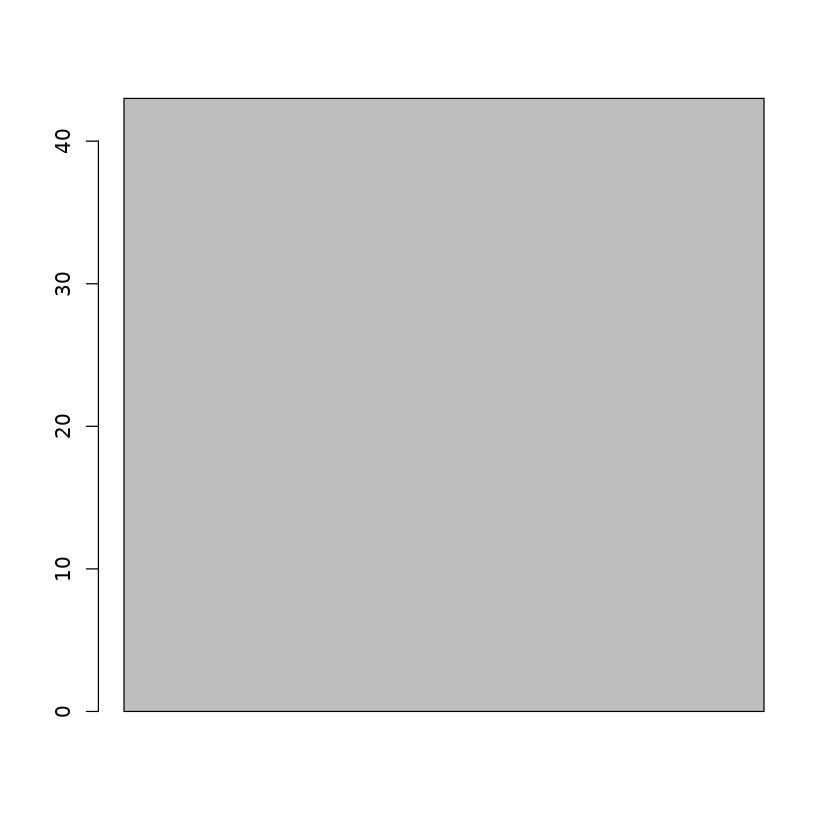

In [16]:
i =matching_directories_increased[2]
i
#DRUG!!!
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
first=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
#DMSO!!!
i=matching_directories_decreased[grep(strsplit(basename(i),"_")[[1]][1],matching_directories_decreased)]
compare=read.table(paste(i,"/",list.files(i,pattern="txt"),sep=""),header=TRUE,sep="\t")
compare=compare[compare[,16]<=0.05,c(2,3,4)]
tempGG=GRanges(seqnames=as.matrix(compare[,1]),ranges=IRanges(start = as.numeric(compare[,2]),end=as.numeric(compare[,3]))) 
second=length(unique(Database[findOverlaps(tempGG,gg)@to,7]))
barplot(first,second)